# Importovanje potrebnih paketa

In [ ]:
#  import sys
#  !{sys.executable} -m pip install tensorflow

In [149]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# Učitavanje i preprocesiranje dataseta

In [120]:
dataset = pd.read_csv("csgo_round_snapshots.csv")
dataset.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [121]:
print("Shape before cleaning:", dataset.shape)
dataset.dropna(inplace=True)
dataset.reset_index(drop=True, inplace=True)
print("Shape after cleaning:", dataset.shape)

Shape before cleaning: (122410, 97)
Shape after cleaning: (122410, 97)


In [122]:
def clean(column_name):    
    """Make list from all values in column."""
    name = set()
    for name_string in dataset[column_name]:
        name.update(name_string.split(','))
    name = sorted(name)
    return name


def plot_column(column_name, n_elem_display=0):
    """ Plot the most frequently values in column."""

    name = clean(column_name)
    dummy_name = pd.DataFrame()
    for n in name:
        dummy_name[n] = [int(n in nm.split(',')) for nm in dataset[column_name]]

    namelist = [n for n in name]
    nlt = dummy_name[namelist].sum()
    nlt = nlt.sort_values(axis=0, ascending=False)
    if n_elem_display != 0:
        return nlt[:n_elem_display].plot(kind="bar", figsize=(10, 10))
    else:
        return nlt[:].plot(kind="bar", figsize=(10, 5))

<AxesSubplot:>

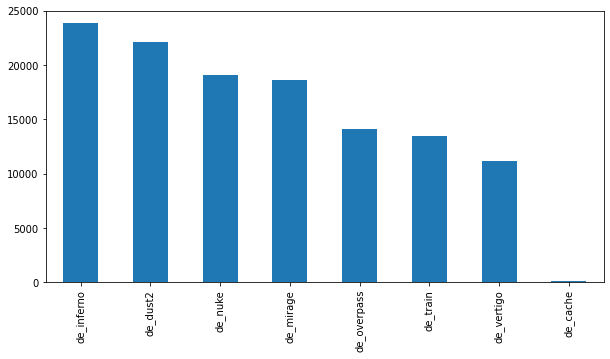

In [123]:
plot_column('map')

<AxesSubplot:>

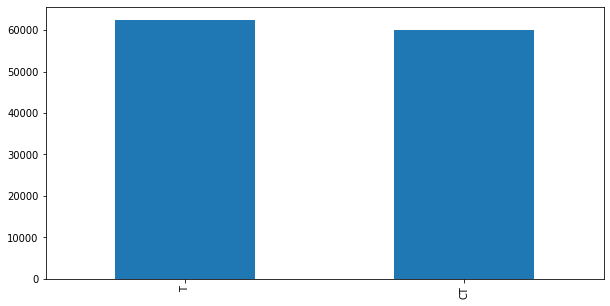

In [124]:
plot_column('round_winner')

In [125]:
dataset = pd.get_dummies(dataset,prefix=['map'], columns =['map'])

In [126]:
for i in range(dataset.shape[0]):
    if dataset['round_winner'][i] == 'CT':
        dataset['round_winner'][i] = 1
    else:
        dataset['round_winner'][i] = 0

c:\users\admin200918\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\admin200918\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [127]:
dataset.head()

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,...,t_grenade_decoygrenade,round_winner,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo
0,175.00,0.0,0.0,False,500.0,500.0,0.0,0.0,4000.0,4000.0,...,0.0,1,0,1,0,0,0,0,0,0
1,156.03,0.0,0.0,False,500.0,500.0,400.0,300.0,600.0,650.0,...,0.0,1,0,1,0,0,0,0,0,0
2,96.03,0.0,0.0,False,391.0,400.0,294.0,200.0,750.0,500.0,...,0.0,1,0,1,0,0,0,0,0,0
3,76.03,0.0,0.0,False,391.0,400.0,294.0,200.0,750.0,500.0,...,0.0,1,0,1,0,0,0,0,0,0
4,174.97,1.0,0.0,False,500.0,500.0,192.0,0.0,18350.0,10750.0,...,0.0,1,0,1,0,0,0,0,0,0


In [128]:
for i in range(dataset.shape[0]):
    if dataset['bomb_planted'][i] == 'FALSE':
        dataset['bomb_planted'][i] = 0.0
    else:
        dataset['bomb_planted'][i] = 1.0

c:\users\admin200918\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [129]:
dataset.head()

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,...,t_grenade_decoygrenade,round_winner,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo
0,175.00,0.0,0.0,True,500.0,500.0,0.0,0.0,4000.0,4000.0,...,0.0,1,0,1,0,0,0,0,0,0
1,156.03,0.0,0.0,True,500.0,500.0,400.0,300.0,600.0,650.0,...,0.0,1,0,1,0,0,0,0,0,0
2,96.03,0.0,0.0,True,391.0,400.0,294.0,200.0,750.0,500.0,...,0.0,1,0,1,0,0,0,0,0,0
3,76.03,0.0,0.0,True,391.0,400.0,294.0,200.0,750.0,500.0,...,0.0,1,0,1,0,0,0,0,0,0
4,174.97,1.0,0.0,True,500.0,500.0,192.0,0.0,18350.0,10750.0,...,0.0,1,0,1,0,0,0,0,0,0


In [130]:
X = dataset.drop('round_winner', axis=1)
y = dataset['round_winner']
print(X.shape)
print(y.shape)

(122410, 103)
(122410,)


In [142]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape = (103,) ))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [143]:
# X = np.asarray(X).astype(np.int)

In [144]:
model.fit(X, y, epochs=10, batch_size=32, validation_split = .2)

Train on 97928 samples, validate on 24482 samples
Epoch 1/10
97664/97928 [============================>.] - ETA: 0s - loss: 2.9344 - accuracy: 0.6643

c:\users\admin200918\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


97928/97928 [==============================] - 20s 202us/sample - loss: 2.9282 - accuracy: 0.6644 - val_loss: 0.9845 - val_accuracy: 0.6075
Epoch 2/10
97928/97928 [==============================] - 21s 215us/sample - loss: 0.5982 - accuracy: 0.7022 - val_loss: 0.5646 - val_accuracy: 0.6861
Epoch 3/10
97928/97928 [==============================] - 21s 212us/sample - loss: 0.5550 - accuracy: 0.7153 - val_loss: 0.5239 - val_accuracy: 0.7189
Epoch 4/10
97928/97928 [==============================] - 19s 198us/sample - loss: 0.5327 - accuracy: 0.7227 - val_loss: 0.5714 - val_accuracy: 0.6903
Epoch 5/10
97928/97928 [==============================] - 19s 196us/sample - loss: 0.5168 - accuracy: 0.7276 - val_loss: 0.5379 - val_accuracy: 0.7205
Epoch 6/10
97928/97928 [==============================] - 20s 201us/sample - loss: 0.5196 - accuracy: 0.7263 - val_loss: 0.5022 - val_accuracy: 0.7218
Epoch 7/10
97928/97928 [==============================] - 20s 206us/sample - loss: 0.5107 - accuracy: 0.7

In [145]:
model1 = Sequential()
model1.add(Dense(128, activation='relu', input_shape = (103,) ))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [146]:
model1.fit(X, y, epochs=10, batch_size=32, validation_split = .2)

Train on 97928 samples, validate on 24482 samples
Epoch 1/10
97928/97928 [==============================] - 19s 194us/sample - loss: 5.4314 - accuracy: 0.6702 - val_loss: 1.2219 - val_accuracy: 0.7039
Epoch 2/10
97928/97928 [==============================] - 21s 217us/sample - loss: 0.8508 - accuracy: 0.6984 - val_loss: 0.5190 - val_accuracy: 0.7280
Epoch 3/10
97928/97928 [==============================] - 21s 210us/sample - loss: 0.5649 - accuracy: 0.7094 - val_loss: 0.5464 - val_accuracy: 0.6809
Epoch 4/10
97928/97928 [==============================] - 21s 212us/sample - loss: 0.5515 - accuracy: 0.7152 - val_loss: 0.5492 - val_accuracy: 0.7338
Epoch 5/10
97928/97928 [==============================] - 23s 234us/sample - loss: 0.5355 - accuracy: 0.7192 - val_loss: 0.5026 - val_accuracy: 0.7285
Epoch 6/10
97928/97928 [==============================] - 19s 189us/sample - loss: 0.5368 - accuracy: 0.7141 - val_loss: 0.5035 - val_accuracy: 0.7280
Epoch 7/10
97928/97928 [====================

In [150]:
opt = keras.optimizers.Adam(learning_rate=0.001)

model2 = Sequential()
model2.add(Dense(1000, activation='relu', input_shape = (103,) ))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [151]:
model2.fit(X, y, epochs=10, batch_size=32, validation_split = .2)

Train on 97928 samples, validate on 24482 samples
Epoch 1/10
97928/97928 [==============================] - 24s 244us/sample - loss: 20.5472 - accuracy: 0.6725 - val_loss: 8.1156 - val_accuracy: 0.7034
Epoch 2/10
97928/97928 [==============================] - 22s 228us/sample - loss: 9.5269 - accuracy: 0.6799 - val_loss: 17.8611 - val_accuracy: 0.5696
Epoch 3/10
97928/97928 [==============================] - 24s 248us/sample - loss: 3.6458 - accuracy: 0.6876 - val_loss: 2.3004 - val_accuracy: 0.6064
Epoch 4/10
97928/97928 [==============================] - 24s 244us/sample - loss: 1.2630 - accuracy: 0.6956 - val_loss: 0.7658 - val_accuracy: 0.6898
Epoch 5/10
97928/97928 [==============================] - 22s 227us/sample - loss: 0.6221 - accuracy: 0.7126 - val_loss: 0.5089 - val_accuracy: 0.7235
Epoch 6/10
97928/97928 [==============================] - 18s 182us/sample - loss: 0.5142 - accuracy: 0.7313 - val_loss: 0.5026 - val_accuracy: 0.7249
Epoch 7/10
97928/97928 [==================

In [152]:
opt = keras.optimizers.Adam(learning_rate=0.00001)

model3 = Sequential()
model3.add(Dense(1000, activation='relu', input_shape = (103,) ))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [153]:
model3.fit(X, y, epochs=10, batch_size=32, validation_split = .2)

Train on 97928 samples, validate on 24482 samples
Epoch 1/10
97928/97928 [==============================] - 23s 238us/sample - loss: 25.6518 - accuracy: 0.6521 - val_loss: 1.4274 - val_accuracy: 0.6590
Epoch 2/10
97928/97928 [==============================] - 24s 245us/sample - loss: 0.9443 - accuracy: 0.6971 - val_loss: 1.0558 - val_accuracy: 0.6551
Epoch 3/10
97928/97928 [==============================] - 23s 235us/sample - loss: 0.8307 - accuracy: 0.7033 - val_loss: 0.6387 - val_accuracy: 0.7140
Epoch 4/10
97928/97928 [==============================] - 24s 247us/sample - loss: 0.7863 - accuracy: 0.7081 - val_loss: 0.7065 - val_accuracy: 0.7042
Epoch 5/10
97928/97928 [==============================] - 23s 230us/sample - loss: 0.7486 - accuracy: 0.7121 - val_loss: 0.6651 - val_accuracy: 0.7162
Epoch 6/10
97928/97928 [==============================] - 23s 232us/sample - loss: 0.7592 - accuracy: 0.7118 - val_loss: 0.8191 - val_accuracy: 0.7024
Epoch 7/10
97928/97928 [===================

In [154]:
opt = keras.optimizers.Adam(learning_rate=0.00001)

model4 = Sequential()
model4.add(Dense(10000, activation='relu', input_shape = (103,) ))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model4.fit(X, y, epochs=100, batch_size=32, validation_split = .2)

Train on 97928 samples, validate on 24482 samples
Epoch 1/100
97928/97928 [==============================] - 24s 248us/sample - loss: 6.1247 - accuracy: 0.6684 - val_loss: 1.0242 - val_accuracy: 0.6731
Epoch 2/100
97928/97928 [==============================] - 13s 130us/sample - loss: 0.9527 - accuracy: 0.6950 - val_loss: 0.7840 - val_accuracy: 0.6953
Epoch 3/100
97928/97928 [==============================] - 9s 94us/sample - loss: 0.8065 - accuracy: 0.7038 - val_loss: 0.7185 - val_accuracy: 0.7046
Epoch 4/100
97928/97928 [==============================] - 9s 91us/sample - loss: 0.7604 - accuracy: 0.7081 - val_loss: 0.6679 - val_accuracy: 0.7161
Epoch 5/100
97928/97928 [==============================] - 9s 91us/sample - loss: 0.7625 - accuracy: 0.7085 - val_loss: 0.7535 - val_accuracy: 0.7057
Epoch 6/100
97928/97928 [==============================] - 9s 91us/sample - loss: 0.7287 - accuracy: 0.7110 - val_loss: 0.6228 - val_accuracy: 0.7126
Epoch 7/100
97928/97928 [=====================

Epoch 55/100
97928/97928 [==============================] - 9s 90us/sample - loss: 0.6365 - accuracy: 0.7361 - val_loss: 0.8870 - val_accuracy: 0.6711
Epoch 56/100
97928/97928 [==============================] - 9s 91us/sample - loss: 0.6568 - accuracy: 0.7353 - val_loss: 0.5576 - val_accuracy: 0.7157
Epoch 57/100
97928/97928 [==============================] - 9s 93us/sample - loss: 0.6454 - accuracy: 0.7349 - val_loss: 0.5363 - val_accuracy: 0.7254
Epoch 58/100
97928/97928 [==============================] - 9s 92us/sample - loss: 0.6693 - accuracy: 0.7318 - val_loss: 0.6067 - val_accuracy: 0.7055
Epoch 59/100
97928/97928 [==============================] - 9s 92us/sample - loss: 0.6553 - accuracy: 0.7351 - val_loss: 0.5900 - val_accuracy: 0.7121
Epoch 60/100
97928/97928 [==============================] - 9s 92us/sample - loss: 0.6303 - accuracy: 0.7374 - val_loss: 0.9406 - val_accuracy: 0.6566
Epoch 61/100
97928/97928 [==============================] - 9s 92us/sample - loss: 0.6557 - ac